# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q2.ipynb`.

## 2.0 Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [12]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)



num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

### 2.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

2.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

<!-- your answer to 1.1.1 -->

2.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

2.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

Initial weights and bias are taken as 0.
1. Prediction is done using

      Y_pred = x.Weights + Bias
2. Loss is calculated

      Loss = Y_true - Y_pred
3. Updating weight Gradient

   Weight Gradient = X' * loss / Length of Y
   where X' is X Transpose
4. Updating Bias Gradient

    Bias Gradient = sum of Loss / Length of Y
5. Weights and Bias are updated

    Weights = Weights - learning_rate*weight_gradient
    Bias = Bias - learning_rate*bias_gradient

6. The Gradient descent adopted here is Mini Batch Gradient descent.
Here Batch wise error is computed and weights are updated.

7. The above Linear Regression is performed for different Learning Rates and the mean square error is computed for each Learning rate.The Learning rate with minimum mean square error is chosen.

In [3]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [4]:

# implement Linear Regression
def predict(x,weights,bias):
  return x.dot(weights)+bias



def calculateMSE(y_true,y_pred):
  return np.square(np.subtract(y_true,y_pred)).mean()


  

In [5]:
def LinearRegressionFit(x, y, w, b, learning_rate, epochs):
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        
    return w, b

In [6]:
mse_dict={}
weights_dict={}
bias_dict={}
alpha=0.002
while alpha<1:
  weights=np.zeros(x_train.shape[1])
  bias = 0
  weights,bias = LinearRegressionFit(x_train,y_train,weights,bias,alpha,epochs=1500)
  y_pred = predict(x_test,weights,bias)
  weights_dict[alpha] = weights
  bias_dict[alpha] = bias
  
  mse_dict[alpha] = calculateMSE(y_test,y_pred)
  print(alpha,"=>",mse_dict[alpha])
  alpha*=2

0.002 => 0.08064367961655713
0.004 => 0.04475342475678951
0.008 => 0.020203456659102413
0.016 => 0.0079152222799092
0.032 => 0.003597164104116851
0.064 => 0.0033183171997550444
0.128 => 0.0034929637765216282
0.256 => 0.0035060486069669033
0.512 => 0.0035060886162526362


In [7]:
mse_lr_items = sorted(mse_dict.items(), key=lambda item: item[1])

In [8]:
learning_rate = mse_lr_items[0][0]
learning_rate

0.064

2.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

In [9]:
y_pred = predict(x_test,weights_dict[learning_rate],bias_dict[learning_rate])

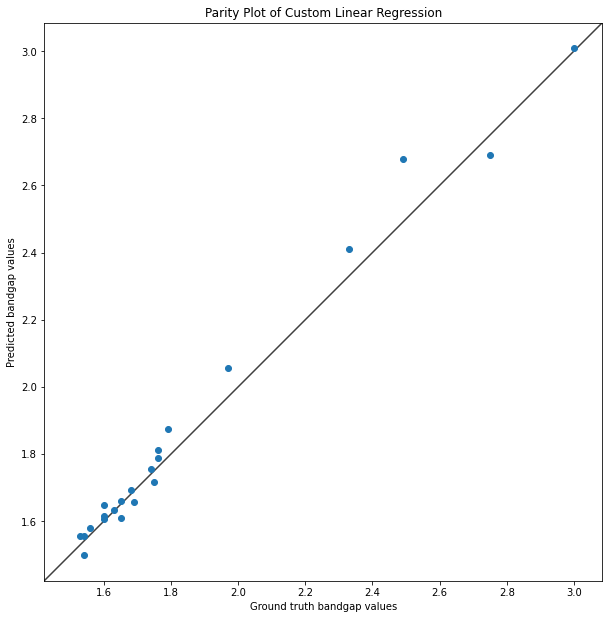

In [10]:
# Get the predictions of x_test into `y_pred`

#
# ...
#

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 2.2 Implement Ridge regression
2.2.1 Explain Ridge regression briefly in 1-2 lines.

<!-- Your answer to 1.2.1 -->
- The cost function of Linear Regression is altered by adding a penalty term.
- It uses L2 Regularization which adds the penalty of square value of coefficients.
- It is suitable for models having multi collinearity.

2.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

In [16]:
# you should not have imported sklearn before this point
import sklearn
import math
# implement Ridge regression and make a table where you explore the effect of different values of `alpha`
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
rmse_ridge=[]
for a in alpha_ridge:
  clf = Ridge(alpha=a)
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  rmse_ridge.append([a,mean_squared_error(y_test,y_pred,squared=False)])

In [17]:
rmse_ridge

[[1e-15, 0.05921223367339159],
 [1e-10, 0.05921223367036925],
 [1e-08, 0.05921223337115717],
 [0.0001, 0.05920921240166124],
 [0.001, 0.05918211748213789],
 [0.01, 0.058920710810527965],
 [1, 0.08964399875239885],
 [5, 0.21280764188373943],
 [10, 0.27058162285533305],
 [20, 0.3196623367090551]]

In [22]:
print(tabulate(rmse_ridge,tablefmt='grid',headers=['Alpha','RMSE']))

+---------+-----------+
|   Alpha |      RMSE |
+=========+===========+
|  1e-15  | 0.0592122 |
+---------+-----------+
|  1e-10  | 0.0592122 |
+---------+-----------+
|  1e-08  | 0.0592122 |
+---------+-----------+
|  0.0001 | 0.0592092 |
+---------+-----------+
|  0.001  | 0.0591821 |
+---------+-----------+
|  0.01   | 0.0589207 |
+---------+-----------+
|  1      | 0.089644  |
+---------+-----------+
|  5      | 0.212808  |
+---------+-----------+
| 10      | 0.270582  |
+---------+-----------+
| 20      | 0.319662  |
+---------+-----------+


## Obervation Analysis
- The alpha is hyperparameter which is a residue to the penalty term.
- As the value of alpha is increased, the weights increases and the variance decreases
- As the value of alpha increases, the model becomes less responsive to the independent variables.
- The ridge regression shrinks the coefficients but does not settle them to 0. Therefore it retains all the features and remains complex.
- The updation is slower in ridge as the weights are squared.

### 2.3 Implement Lasso regression
2.3.1 Explain Lasso regression briefly in 1-2 lines.
- The cost function of Linear Regression is altered by adding a penalty term.
- It uses L1 Regularization which adds the penalty of absolute value of coefficients.
- It is suitable for building spare models.


2.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

In [ ]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`

In [23]:

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
rmse_lasso=[]
for a in alpha_lasso:
  clf = Lasso(alpha=a)
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  rmse_lasso.append([a,mean_squared_error(y_test,y_pred,squared=False)])


In [24]:
print(tabulate(rmse_lasso,tablefmt='grid',headers=['Alpha','RMSE']))

+---------+-----------+
|   Alpha |      RMSE |
+=========+===========+
|  1e-15  | 0.0592122 |
+---------+-----------+
|  1e-10  | 0.0592122 |
+---------+-----------+
|  1e-08  | 0.0592122 |
+---------+-----------+
|  0.0001 | 0.059197  |
+---------+-----------+
|  0.001  | 0.0585304 |
+---------+-----------+
|  0.01   | 0.0673177 |
+---------+-----------+
|  1      | 0.424424  |
+---------+-----------+
|  5      | 0.424424  |
+---------+-----------+
| 10      | 0.424424  |
+---------+-----------+
| 20      | 0.424424  |
+---------+-----------+


## Obervation Analysis
- The alpha is hyperparameter which is a residue to the penalty term.
- As the value of alpha is increased, the weights increases and the variance decreases
- As the value of alpha is increased, the slope of best fit line decreases and the line becomes horizontal.
- The updation is faster in Lasso when compared to Ridge as the weights are absolute values.